
## Project:      An Analysis of Missed Patient Appointments in Brazil in the Year 2016


                                         by

                                Jacktone Etemesi

                                Phone: +254708578181

                        email: jacktoneetemesi1@gmail.com


## Introduction


This project contains an analysis of patient records in brazil to determine whether or not patients show up for their scheduled appointments

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row

Q1. In general, what sex is associated with the highest no show up rate?

Q2. What age bracket is associated with the highest number of missed appointments?

Q3. What are the 5 leading hospital neighbourhoods in alcoholism cases? How do these neigbourhoods compare in terms of missed patient appointments?

Q4. Is there a correlation between the number of days a patient in a given region has to wait for an appointment and the number of missed appointments in that particular region?



In [36]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Step 1: wrangling


### General Properties

In [37]:
#Loading our dataset
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Checking for the shape of our dataset in terms of number of rows and columns

In [38]:
df.shape

(110527, 14)

Our dataset has 110,527 rows and 14 columns

#### Checking for columns and their data types

In [39]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The following issues within our columns need to be adressed.

    - Column names need to be changed to lowercase
    - ScheduleDay and AppointmentDay columns need to be converted to datetime dtype
    - No_show needs to be properly enconded(from dataset options pdf notes)

## Step 2: Getting the dataset ready for analysis

### a. Changing column names to lowercase letters


In [41]:
for col in df.columns:
    df.rename(columns=lambda x:x.lower(),inplace=True)
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


### b. Converting scheduledday and appointmentday columns into datetime dtype

In [42]:
df['appointmentday']=pd.to_datetime(df['appointmentday'],utc=True)
df['scheduledday']=pd.to_datetime(df['scheduledday'],utc=True)

In [43]:
df[['scheduledday','appointmentday']].dtypes

scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
dtype: object

### c. Removing negative values from the age columns


In [44]:
#Checking for all the age values containing -1 
df[df['age']==-1]
#Replacing the value with 0 
df['age'].loc[99832]=0


c:\Users\jackt\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

### c. Checking for Missing Values

In [46]:
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no-show           0
dtype: int64

Our dataframe does not have any missing values.

### d. Checking for duplicate values

In [47]:
df.duplicated().sum()

0

Our dataset does not have any duplicate entries!


## Step 3: Exploratory Data Analysis


### Q1. In general, what sex is associated with the highest no show up rate?

In [48]:
#Checking for the number of patients under each gender
df.groupby('gender').count()['no-show']

gender
F    71840
M    38687
Name: no-show, dtype: int64

In [49]:
#Lets first mask out a datafame containing the details of all the patients who didnt show up for an appointment.
#according to the instructions on the dataset options pdf, the no-show column uses No to indicate that a patient showed up for the appointmnet and Yes to indicate a missed appointment.
missed_df=df[df['no-show']=='Yes']
missed_df.shape

(22319, 14)

A total of 22,319 patients missed their appointments in 2016.

In [50]:
# Finding the number of women who did not show up for their appointment
missed_f=missed_df.query('gender == "F"').count()['no-show']
missed_f

14594

In [51]:
#finding the number of men who didn't show up for their appointment
missed_m=missed_df.query('gender == "M"').count()['no-show']
missed_m

7725

In [52]:
# Checking to see if all our observations are included
missed_df.shape[0]==missed_m+missed_f

True

In [53]:
total_missed=missed_df.shape[0]
total_missed

22319

In [54]:
# lects create a function to calculate percentages within our dataset

def compute_prc(x,y): #where x is the total of the population and y is observed variables
    prc=round((x/y)*100)
    return prc
women_prc=compute_prc(x=missed_f,y=total_missed)
men_prc=compute_prc(x=missed_m,y=total_missed)

print(f'Women = {women_prc}%\nMen = {men_prc}%')

Women = 65%
Men = 35%


Out of the 22,319 patients that missed their appointments;

    - 14,594 of them were women
    - 7,725 of them were men
This comparison can be clearely represented in a bar garph as follows

Text(0.5, 1.0, 'Missed appointments between males and Females')

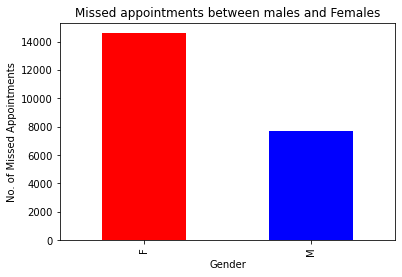

In [55]:
colors=['red','blue']
missed_df.groupby('gender').count()['no-show'].plot.bar(color=colors)
plt.xlabel('Gender')
plt.ylabel('No. of Missed Appointments')
plt.title('Missed appointments between males and Females')

From the above analysis, more women miss their appointments as compared to men. 

    - Number of women who missed an appointment = 14,594
    
    - Number of men who missed an appointment= 7,725
    

### Q2. What age bracket is associated with the highest number of missed appointments?

This question tries to establish a relationship between patients age and rate of showing up for an appointment.

we will use the following steps to tackle the question;
 
    - Check out statistical sunnary of the age column in order to determine our bins
    - Insert an age_group column in our dataset and drop the age column
    - group missed appointments by age_group and find their count
    - plot a pie chart to show the relationship

We'll start by taking a look at the age column 

In [56]:
df['age'].describe()

count    110527.000000
mean         37.088883
std          23.110190
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

From the above results we know that the oldest patient is 115 years while the youngest patient is -1 years old.
Since our data is ungrouped, we will need to sort it and then group it in 4 categories with the following labels;

    - kid - below 18 years
    - youth - between 18 and 35 years
    - adult - between 35 and 55 years
    - elderly - above 55 years

    

In [57]:
# Creating labels and bins
labels='kid youth adult elderly'.split(' ')
bins=[0,18,35,55,115]
# inserting age groups into our dataframe
df['age_group']=pd.cut(x=df['age'],bins=bins, labels=labels,right=False)
# droping the age column from our dataset
df.drop(columns='age',axis=1,inplace=True)


In [58]:
df.head(5)

,patientid,appointmentid,gender,scheduledday,appointmentday,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,1,0,0,0,0,No,elderly
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,0,0,0,0,0,No,elderly
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,MATA DA PRAIA,0,0,0,0,0,0,No,elderly
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,PONTAL DE CAMBURI,0,0,0,0,0,0,No,kid
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,JARDIM DA PENHA,0,1,1,0,0,0,No,elderly


In [59]:
# grouping missed appointments by age_group

age_df=df.query('`no-show`=="Yes"').groupby('age_group').count()['no-show'].sort_values(ascending=False)
age_df

age_group
kid        5997
adult      5948
youth      5814
elderly    4557
Name: no-show, dtype: int64

In [60]:
# calculating percentages
total_absentees=age_df.sum()
kids_prc=compute_prc(age_df['kid'],total_absentees)
youths_prc=compute_prc(age_df['youth'],total_absentees)
adults_prc=compute_prc(age_df['adult'],total_absentees)
elderly_prc=compute_prc(age_df['elderly'],total_absentees)

print('Kids percentage = {}%\nAdults percentage = {}%\nYouths percentage = {}%\nElderly percentage = {}%'.format(kids_prc,youths_prc,adults_prc,elderly_prc))

Kids percentage = 27%
Adults percentage = 26%
Youths percentage = 27%
Elderly percentage = 20%


Representing the above results in a bar plot

Text(0.5, 1.0, 'Missed Appointments across Age groups')

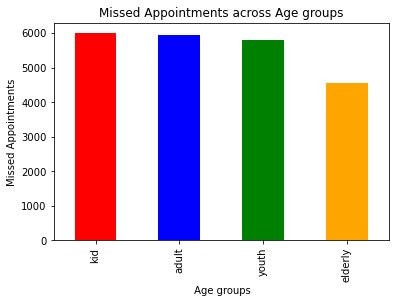

In [61]:
colors='red blue green orange'.split(' ')
age_df.plot.bar(color=colors)
plt.xlabel(' Age groups')
plt.ylabel('Missed Appointments')
plt.title('Missed Appointments across Age groups')

Representing the comparison in a pie chart

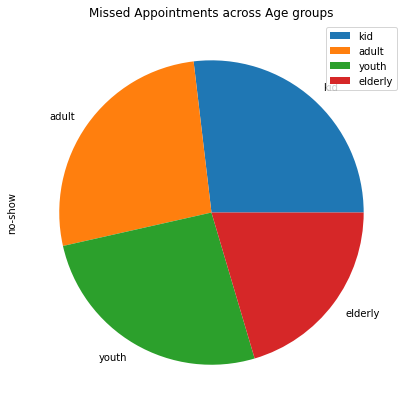

In [62]:
age_df.plot.pie(figsize=(7,7))
plt.title('Missed Appointments across Age groups')
plt.legend()

The above analysis indicates that kids (below 18 years) have the highest record of missed appointments.

### Q3. What are the 5 leading hospital neighbourhoods in alcoholism cases? How do these neigbourhoods compare in terms of missed patient appointments?

We will follow the following steps to tackel this question;

    1. Determine the number of unique hospital neighbourhoods
    2. create a dataframe containing all the alcoholic patients
    3. Group alcoholic patients with relation to hospital regions
    4. Plot the relationship

In [63]:
# checking for the number of unique neighborhoods in our dataset
df['neighbourhood'].nunique()

81

Now the we know our dataset has 81 different regions, well proceed to grouping alcoholic patients by their neighbourhood

In [64]:
# Creating a dataframe containing alcoholic patients
alcoholism_df=df.query('alcoholism == 1')
alcoholism_df.shape

(3360, 14)

In [65]:
#Grouping alcoholic patients by their neighbourhoods
alcoholism_df.groupby('neighbourhood').count()['alcoholism'].sort_values(ascending=False)[:5]

neighbourhood
SANTA MARTHA    344
DA PENHA        172
BONFIM          166
SÃO PEDRO       150
ROMÃO           125
Name: alcoholism, dtype: int64

From the results above, the regions leading in alcoholism cases are;

    - SANTA MARTHA    344
    - DA PENHA        172
    - BONFIM          166
    - SÃO PEDRO       150
    - ROMÃO           125

In [66]:
# Comparing the number of patients who did not show up for their appointment from the top 5 neigbourhood in alchoholism

top5_comparison=df.query('neighbourhood ==["SANTA MARTHA","DA PENHA","BONFIM","SÃO PEDRO","ROMÃO"]').query('`no-show`=="Yes"').groupby('neighbourhood').count()['no-show']
top5_comparison

neighbourhood
BONFIM          550
DA PENHA        429
ROMÃO           474
SANTA MARTHA    496
SÃO PEDRO       515
Name: no-show, dtype: int64

The top 5 alcoholism neigbourhoods rank as follows in terms of missed patient appointments;

    - BONFIM          550
    - DA PENHA        429
    - ROMÃO           474
    - SANTA MARTHA    496
    - SÃO PEDRO       515

The comparison can be plotted as follows

Text(0.5, 1.0, 'A comparison of missed appointments')

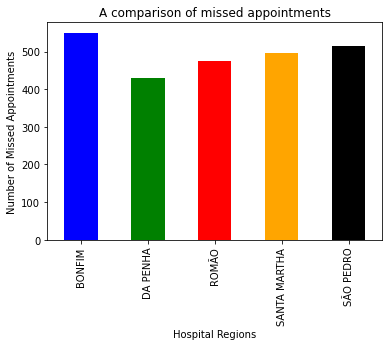

In [67]:
colors=['blue','green','red','orange','black']
top5_comparison.plot.bar(color=colors)
plt.xlabel('Hospital Regions')
plt.ylabel('Number of Missed Appointments')
plt.title('A comparison of missed appointments')

### Q4. Is there a correlation between the number of days a patient in a given region has to wait for an appointment and the number of missed appointments in that particular region?

We can further investigate why these regions have high rates of missed appointments by creating a waiting_time column that will record the number of days a patient has to wait for an appointment. We can then compute the average waiting time for each hospital neigbourhood and check if there is a relationship between waiting time and number of missed appointments

In [68]:
#Lets create another column showing how many days patients have to wait for an appointment
time_diff=df['appointmentday']-df['scheduledday']
days_count=[]
for entries in time_diff:
    days=(np.timedelta64(entries,'ns').astype('timedelta64[D]'))/np.timedelta64(1, 'D')
    days_count.append(days)
df['waiting_time']=days_count

In [69]:
# finding the average waiting time for each of the neighbourhoods
mean_waiting=df.query('`no-show`=="Yes"').groupby('neighbourhood').mean()['waiting_time']
hood_no_show=df.query('`no-show`=="Yes"').groupby('neighbourhood').count()['no-show']
# checking for correlation between waiting_time and missed appointments
hood_no_show.corr(mean_waiting)


0.2219300749960696

There is a weak positive correlation of <b>0.2219</b> between the number of missed appointments and the time patients have to wait to get an appointment


## Conclusions

### Assumptions:

This analysis is based on the following assumptions:
1. All patients prefer going to hospitals within their neigbourhoods. With this assumption, we consider the hospital neigbourhood to be the same as that of patients who sheduled for an appointment in that particular hospital neigbourhood.

2. We assume that the hospitals did not cancel or terminate any scheduled appointments. The only way an appointment can be missed is when a patient fails to show up


### Limitations:

The data set did not provide information on how far from the hospital neignourhood the patients were. This information could be used to determine if the distance patients have to cover to get an appointment determines whether or not a patient will show up for an appointment.


### Conclusions

The following conclusions can be made from the above analyses;
1. Female patients have a higher rate of missing appointments compared to men. Female patients constitute 65% of the 23,319 missed appointments while men contributed 35%.

2. Patients below the age of 18 have the highest "no-show" rate. 27% of all the missed appointments are from patients in this age group.

3. There is a weak correlation relationship between the number of days patients have to wait for an appointment and the number of missed appointments in a given hospital neighbourhood.

4. Of all the 81 hospital regions, SANTA MARTHA has the highest record of alcoholic patients and its the 3 rd ranking region in terms of missed appointments.

5. BONFIM hospital neighbouhood has the highest number of missed appointments

Future study area:

A researcher could look into the cummulative contribution of all the terminal illnesses to the number of missed appointments.


